In [1]:
!mkdir-p~/.kaggle
!cp kaggle.json ~/.kaggle/


/bin/bash: line 1: mkdir-p~/.kaggle: No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:43<00:00, 33.5MB/s]
100% 1.06G/1.06G [00:43<00:00, 26.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
#create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size= (3, 3),padding='valid' ,input_shape = (256, 256, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2,padding='valid'))

model.add(Conv2D(64,kernel_size= (3, 3),padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2,padding='valid'))

model.add(Conv2D(128,kernel_size= (3, 3),padding='valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2,padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(train_ds,epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 86ms/step - accuracy: 0.5892 - loss: 1.9012 - val_accuracy: 0.7134 - val_loss: 0.5674
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7269 - loss: 0.5499 - val_accuracy: 0.7490 - val_loss: 0.5232
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.7745 - loss: 0.4679 - val_accuracy: 0.7622 - val_loss: 0.5009
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 83ms/step - accuracy: 0.8129 - loss: 0.4085 - val_accuracy: 0.8026 - val_loss: 0.4451
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.8454 - loss: 0.3465 - val_accuracy: 0.7862 - val_loss: 0.5479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.8895 - loss: 0.2600 - val_accuracy: 0.7990 - val_loss: 0.5577
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9258 - loss: 0.1880 - val_accuracy: 0.8128 - val_loss: 0.8213
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9545 - loss: 0.1208 -

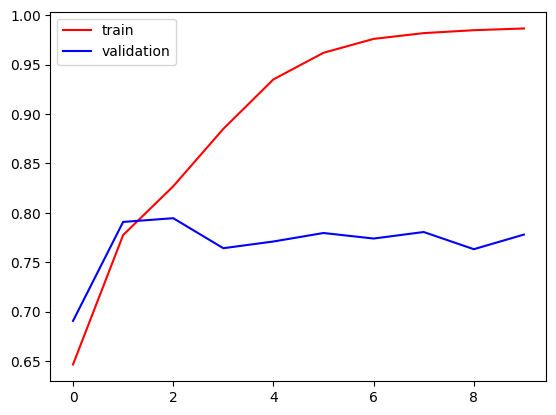

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

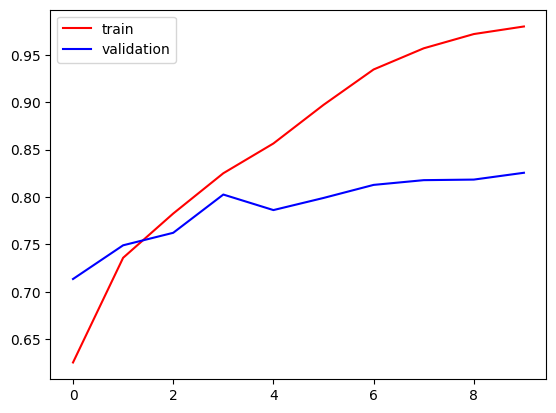

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

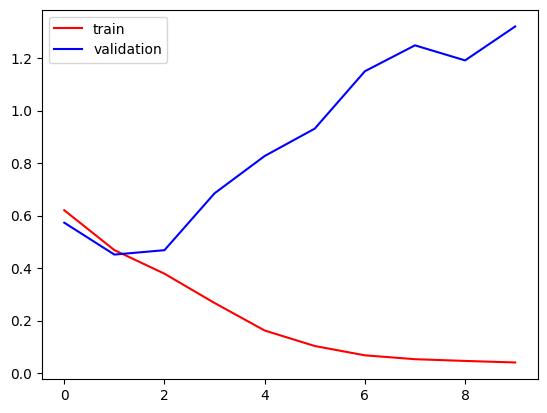

In [12]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

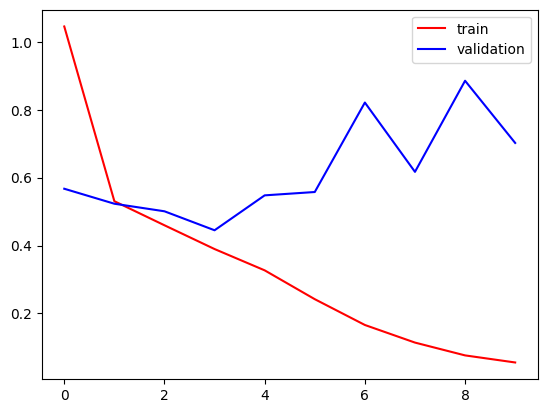

In [15]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [20]:
import cv2
test_img = cv2.imread('/content/dog.jpg')

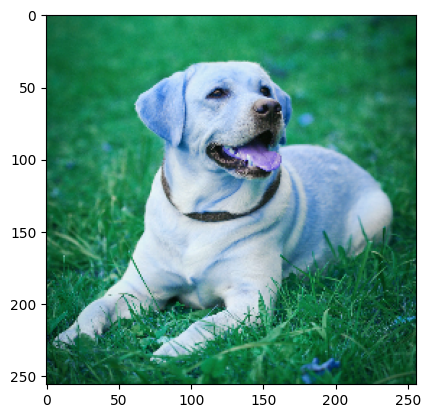

In [25]:
plt.imshow(test_img)

In [21]:
test_img.shape

(2100, 2000, 3)

In [22]:
test_img = cv2.resize(test_img, (256, 256))

In [23]:
test_input=test_img.reshape((1, 256, 256, 3))

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step


array([[1.]], dtype=float32)

In [32]:
import cv2
test_img1 = cv2.imread('/content/cat.jpg')

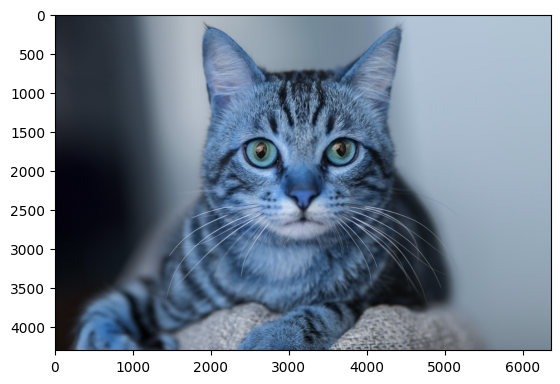

In [33]:
plt.imshow(test_img1)

In [34]:
test_img1.shape

(4299, 6359, 3)

In [35]:
test_img1 = cv2.resize(test_img1, (256, 256))

In [36]:
test_input1=test_img1.reshape((1, 256, 256, 3))

In [37]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)